In [1]:
pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=d459f3207380694b40f081f7aaa0058319e56b8df653ed1bdd46e2d93fbff28b
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [3]:
import pandas as pd
#we pull the data and throw away unneeded parts.
findata = pd.read_csv("finaldata.csv") 

sorted = findata.set_index(["country", "week"]).loc[:,"valence_score":]
sorted

valence_score    gdpdev    gdplevel
country       week                                         
argentina     2019-W45         0.6874 -0.034997  101.366285
              2019-W46         0.6677 -0.044661  100.414726
              2019-W47         0.7087 -0.028907  102.044587
              2019-W48         0.7357 -0.025898  102.375832
              2019-W49         0.7554 -0.042388  100.724767
...                               ...       ...         ...
united-states 2021-W15         0.6842  0.015746  101.691043
              2021-W16         0.6842  0.010098  101.146710
              2021-W17         0.6842  0.004221  100.582220
              2021-W18         0.6939  0.014572  101.671582
              2021-W19         0.6842  0.014749  101.718091

[2844 rows x 3 columns]

In [4]:
import pymc3 as pm

import numpy as np
import matplotlib.pyplot as plt


In [5]:
formula = "valence_score ~ gdpdev"

with pm.Model() as model_1:
    
    pm.GLM.from_formula(formula, data=sorted)
    trace_1 = pm.sample(draws=1000, tune=1000, chains=2)

We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-6-c75cd1943a56>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_1 ,figsize=(20,20))
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3413cc460>,
      dtype=object)

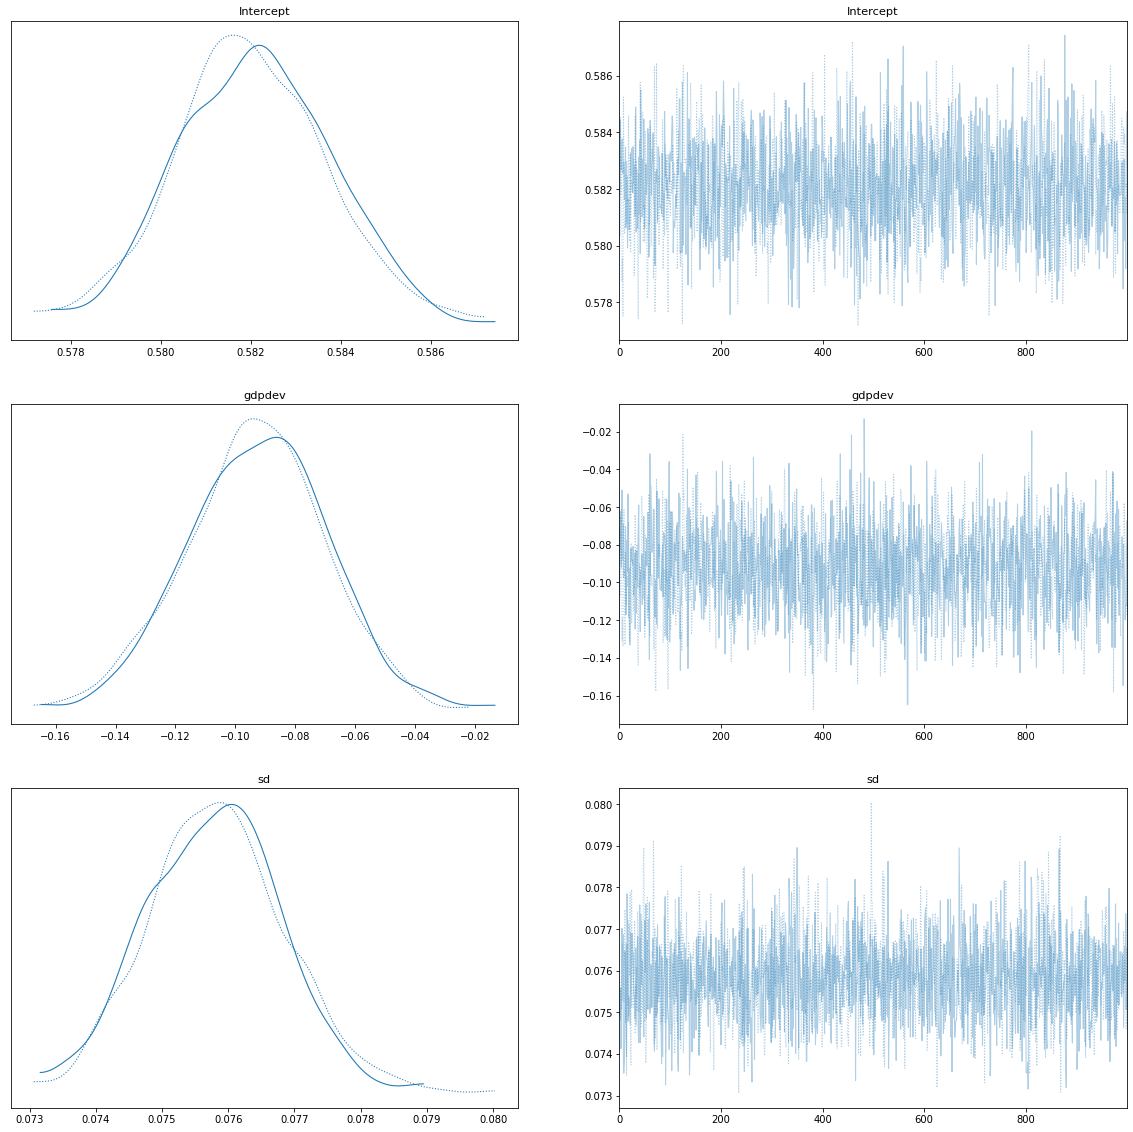

In [6]:
pm.traceplot(trace_1 ,figsize=(20,20))

<ipython-input-7-e4caf9041222>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_1, figsize=(15,15))
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa341137490>],
      dtype=object)

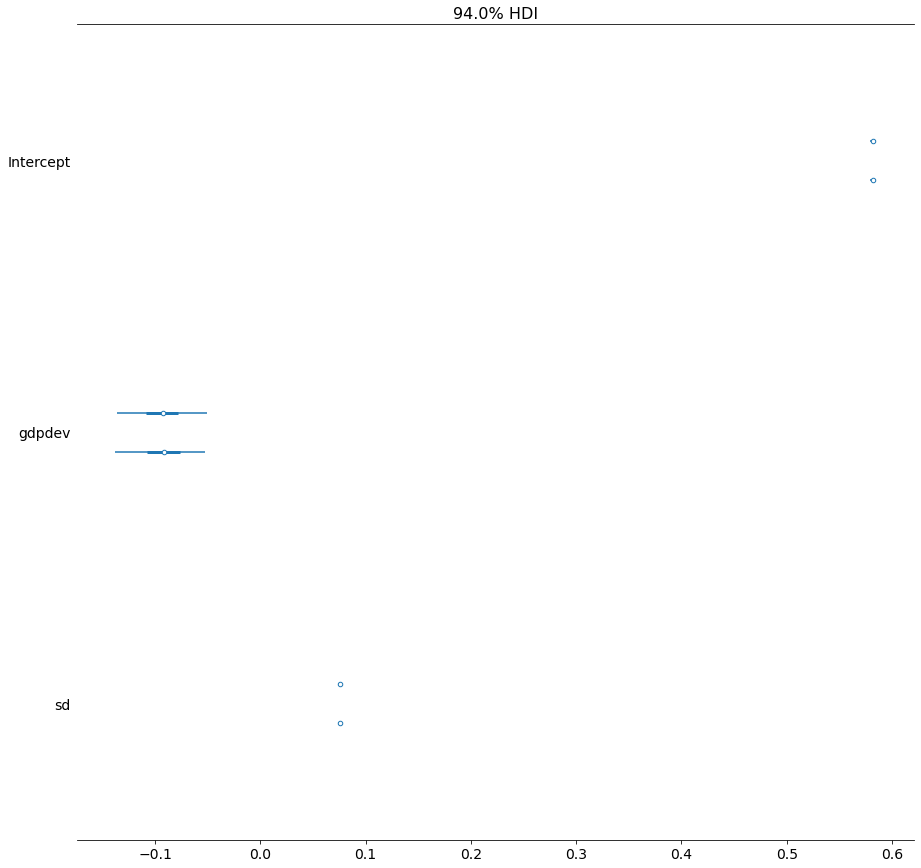

In [7]:
pm.forestplot(trace_1, figsize=(15,15))

In [8]:
pm.summary(trace_1)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.582,0.002,0.579,0.585,0.000,0.0,1811.0,1499.0,1.0
gdpdev,-0.093,0.023,-0.138,-0.052,0.001,0.0,1973.0,1557.0,1.0
sd,0.076,0.001,0.074,0.078,0.000,0.0,2418.0,1569.0,1.0


In [9]:
formula2 = "valence_score ~ gdplevel"

with pm.Model() as model_2:
    
    pm.GLM.from_formula(formula2, data=sorted)
    trace_2 = pm.sample(draws=1000, tune=1000, chains=2)

We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-10-d253a3d76488>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_2 ,figsize=(20,20))
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa34297aa30>,
      dtype=object)

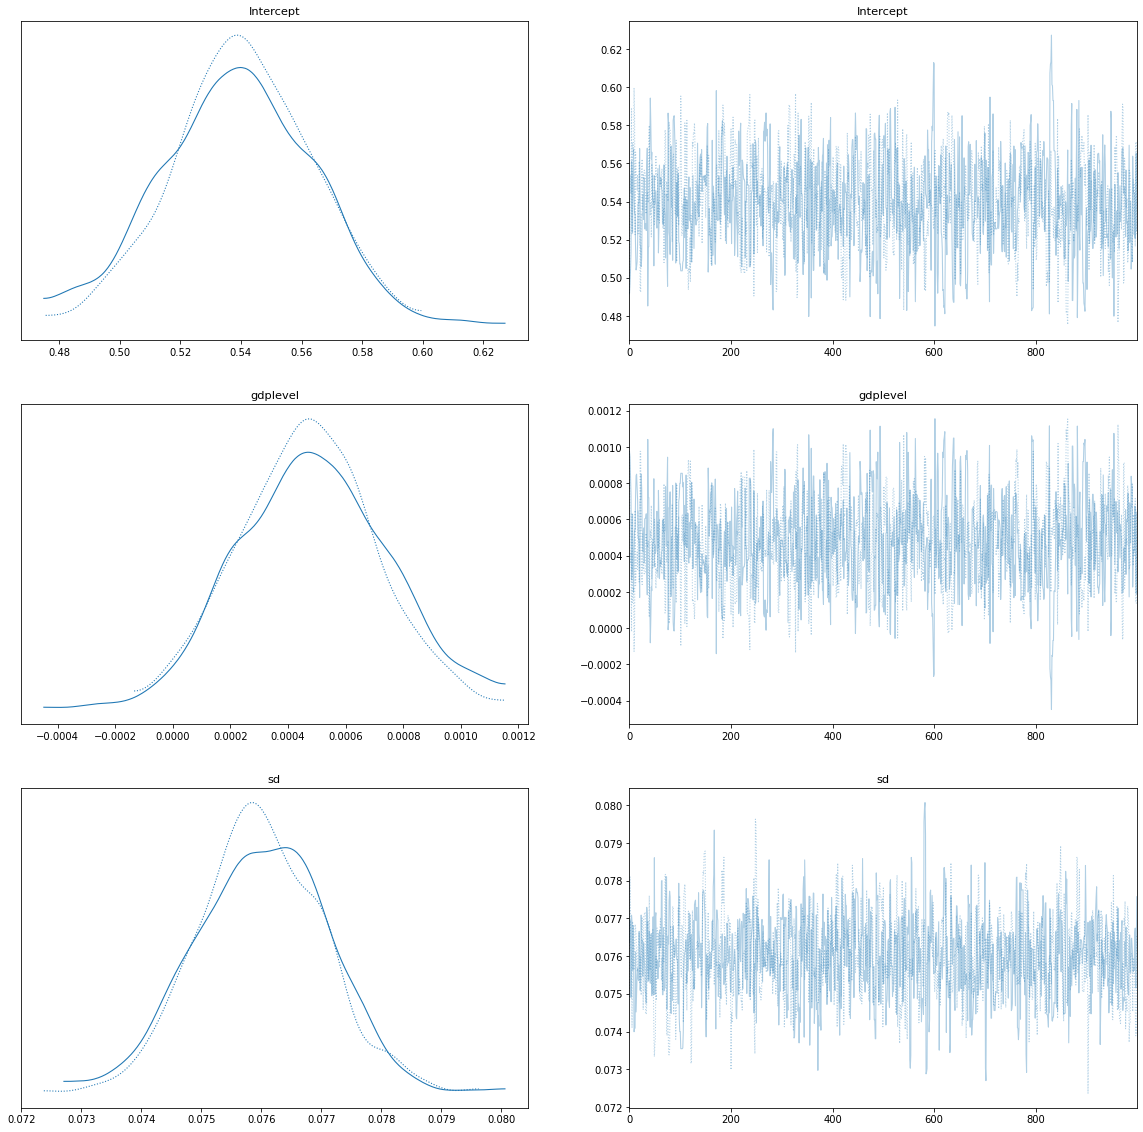

In [10]:
pm.traceplot(trace_2 ,figsize=(20,20))

<ipython-input-11-14e07039937f>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_2, figsize=(15,15))
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa340cb8e20>],
      dtype=object)

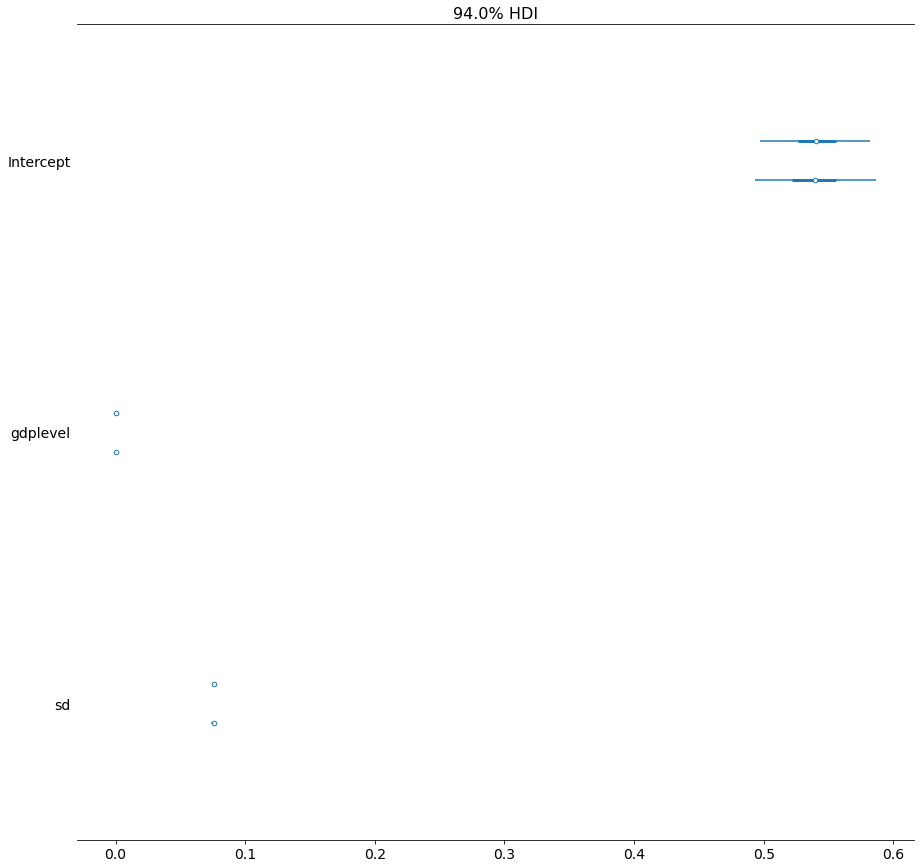

In [11]:
pm.forestplot(trace_2, figsize=(15,15))

In [12]:
pm.summary(trace_2)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.540,0.024,0.493,0.582,0.001,0.001,650.0,827.0,1.01
gdplevel,0.000,0.000,0.000,0.001,0.000,0.000,656.0,779.0,1.01
sd,0.076,0.001,0.074,0.078,0.000,0.000,1019.0,896.0,1.00


**Note that the GDP levels' coefficient distribution is both hard to interpret and the results are weird, so we'll use GDP deviations for updating priors analysis**

# Step 2: Predicting Posteriors

#### note that the trace_3 here is the same as trace_1.

In [13]:
formula3 = "valence_score ~ gdpdev"

with pm.Model() as model_3:
    
    pm.GLM.from_formula(formula, data=sorted)
    trace_3 = pm.sample(draws=1000, tune=1000, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_3)

We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


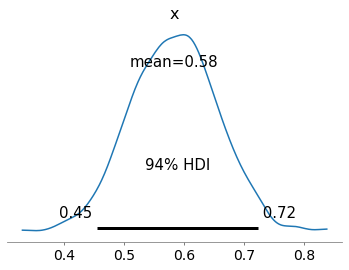

In [14]:
pm.plot_posterior(posterior_predictive['y'][:,0])

In [18]:
newsort=sorted.reset_index()
errors=[]
for index, test_example in newsort.iterrows():
    error=posterior_predictive['y'][:,index] - test_example['valence_score']
    errors.append(error)
    
error_distribution=np.array(errors).reshape(-1)
error_distribution.shape

(5688000,)

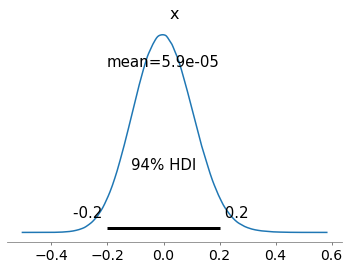

In [19]:
# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

# Step 3: Assign Prior Distributions

In [20]:
Y = sorted['valence_score']
X1 = sorted['gdpdev']

with pm.Model() as model_4:
    beta0 = pm.Normal("beta0", 0.0, 1.0) #Change to uniform distribution to see what happens (gamma, halfnormal, uniform, etc.)
    beta1 = pm.Normal("beta1", 0.0, 1.0)

    mean_y = beta0 + beta1 * X1
 
    pm.Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)
    trace_4 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_4)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-21-f66afdc06614>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_4 ,figsize=(20,20))
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa33e3a9a30>,
      dtype=object)

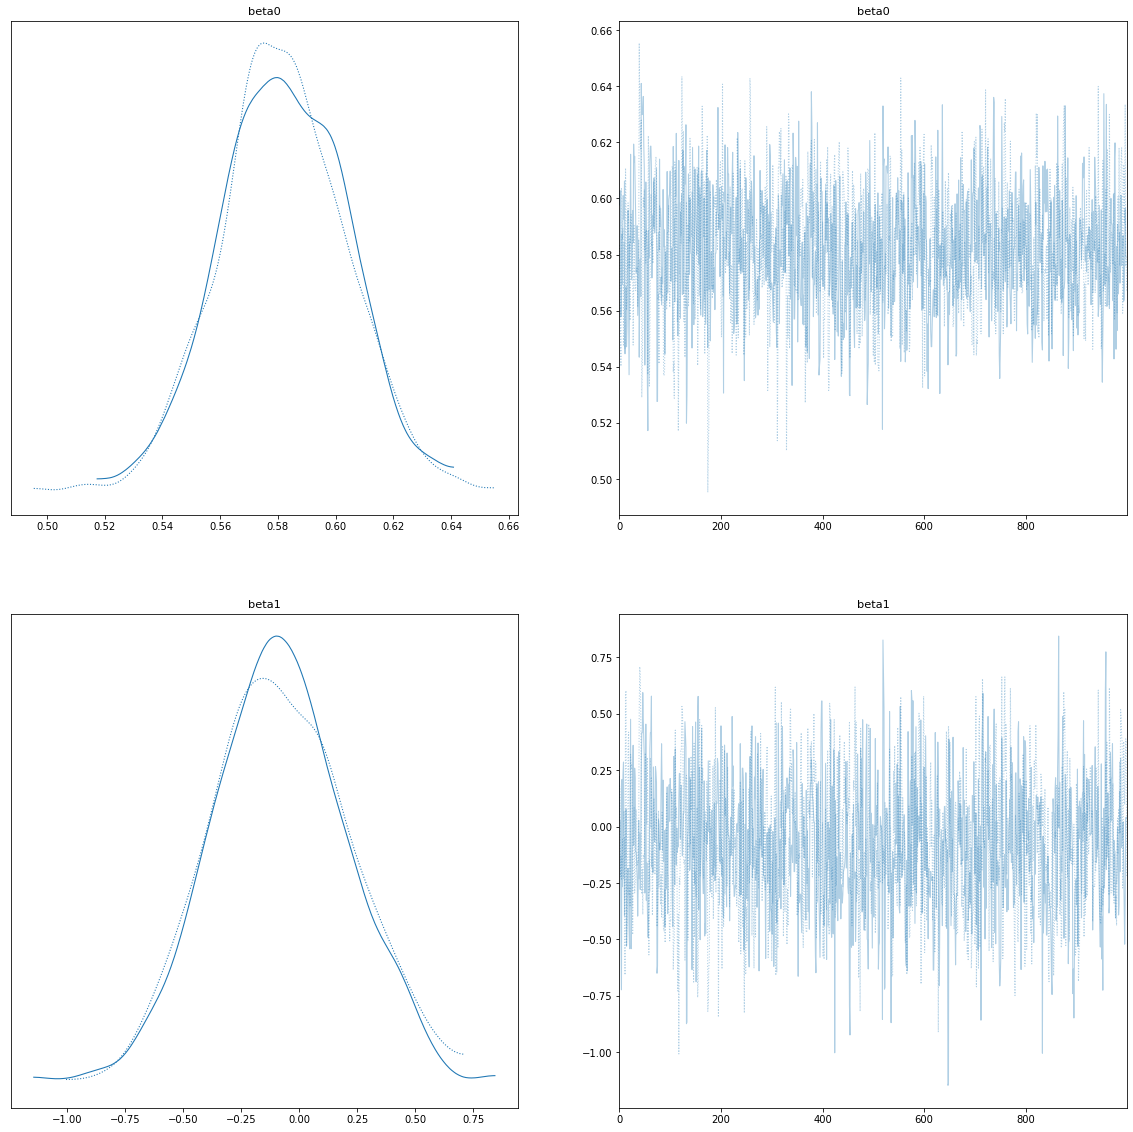

In [21]:
pm.traceplot(trace_4 ,figsize=(20,20))

# Step 4: Updating Priors

In [22]:
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

In [23]:
#Get the mean coefficients from the posteriors of the Model 4.
beta0_true = np.mean(trace_4.get_values('beta0'))
beta1_true = np.mean(trace_4.get_values('beta1'))

In [24]:
#Now use those posteriors as priors in the new model.
from pymc3 import Model, Normal, Slice, sample
from scipy import stats
from pymc3.distributions import Interpolated

trace = trace_4
traces =  [trace]

model = Model()
with model:
    # Priors are posteriors from previous iteration
    beta0 = from_posterior("beta0", trace["beta0"])
    beta1 = from_posterior("beta1", trace["beta1"])

    # Expected value of outcome
    mean_y = beta0 + beta1 * X1

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

    # draw 1000 posterior samples
    trace = sample(1000) 
    # it is just another way of sampling data, iterates 1000 draws and 1000 tunes
    traces.append(trace)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


Posterior distributions after 2 iterations.


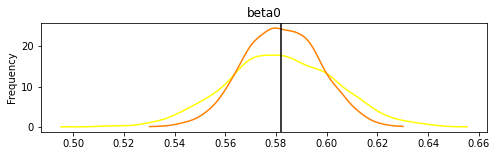

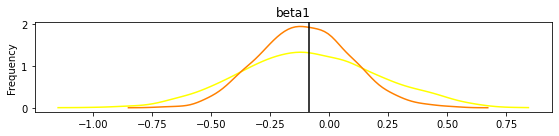

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout();

# Step 5: Trying Alternative Priors: Uniform

In [31]:
Y = sorted['valence_score']
X1 = sorted['gdpdev']

with pm.Model() as model_5:
    beta0 = pm.Uniform("beta0", lower=0.0, upper=1.0)
    beta1 = pm.Uniform("beta1", lower=-1.0, upper=1.0)

    mean_y = beta0 + beta1 * X1
 
    pm.Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)
    trace_5 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_5)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


In [32]:
#Get the mean coefficients from the posteriors of the Model 5.
beta0_true = np.mean(trace_5.get_values('beta0'))
beta1_true = np.mean(trace_5.get_values('beta1'))

In [33]:
#Now use those posteriors as priors in the new model.
from pymc3 import Model, Normal, Slice, sample
from scipy import stats
from pymc3.distributions import Interpolated

trace = trace_5
traces =  [trace]

model = Model()
with model:
    # Priors are posteriors from previous iteration
    beta0 = from_posterior("beta0", trace["beta0"])
    beta1 = from_posterior("beta1", trace["beta1"])

    # Expected value of outcome
    mean_y = beta0 + beta1 * X1

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

    # draw 1000 posterior samples
    trace = sample(1000) 
    # it is just another way of sampling data, iterates 1000 draws and 1000 tunes
    traces.append(trace)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


Posterior distributions after 2 iterations.


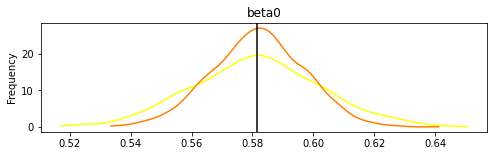

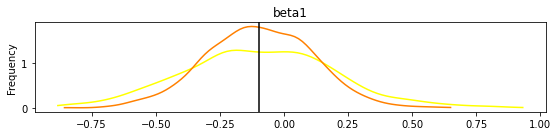

In [34]:
print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout();

# Step 5: Trying Alternative Priors: Triangular

In [35]:
Y = sorted['valence_score']
X1 = sorted['gdpdev']

with pm.Model() as model_6:
    #take the mean values from the prior model as the central value of the triangular distribution.
    beta0 = pm.Triangular("beta0", lower=0.0, c=beta0_true, upper=1.0)
    beta1 = pm.Triangular("beta1", lower=-1.0, c=beta1_true, upper=1.0)

    mean_y = beta0 + beta1 * X1
 
    pm.Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)
    trace_6 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_6)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


In [36]:
#Get the mean coefficients from the posteriors of the Model 5.
beta0_true = np.mean(trace_6.get_values('beta0'))
beta1_true = np.mean(trace_6.get_values('beta1'))

In [37]:
#Now use those posteriors as priors in the new model.
from pymc3 import Model, Normal, Slice, sample
from scipy import stats
from pymc3.distributions import Interpolated

trace = trace_6
traces =  [trace]

model = Model()
with model:
    # Priors are posteriors from previous iteration
    beta0 = from_posterior("beta0", trace["beta0"])
    beta1 = from_posterior("beta1", trace["beta1"])

    # Expected value of outcome
    mean_y = beta0 + beta1 * X1

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

    # draw 1000 posterior samples
    trace = sample(1000) 
    # it is just another way of sampling data, iterates 1000 draws and 1000 tunes
    traces.append(trace)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


Posterior distributions after 2 iterations.


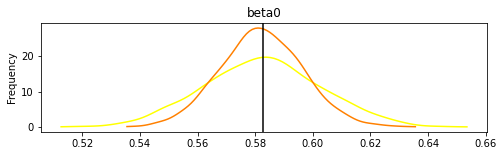

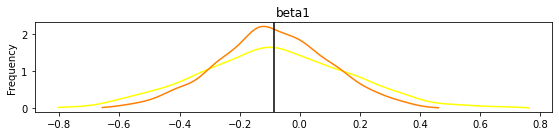

In [38]:
print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout()

In [39]:
pm.summary(trace_3)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.582,0.002,0.579,0.585,0.000,0.0,1444.0,1137.0,1.0
gdpdev,-0.092,0.023,-0.135,-0.047,0.001,0.0,1654.0,1310.0,1.0
sd,0.076,0.001,0.074,0.078,0.000,0.0,2277.0,1376.0,1.0


In [40]:
pm.summary(trace_4)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,0.582,0.022,0.540,0.620,0.001,0.000,1244.0,1251.0,1.0
beta1,-0.084,0.296,-0.636,0.465,0.009,0.006,1102.0,1251.0,1.0


In [41]:
pm.summary(trace_5)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,0.581,0.021,0.540,0.621,0.001,0.000,1013.0,1118.0,1.0
beta1,-0.097,0.296,-0.653,0.472,0.009,0.007,1075.0,1217.0,1.0


In [42]:
pm.summary(trace_6)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,0.583,0.020,0.542,0.619,0.001,0.000,865.0,1146.0,1.0
beta1,-0.084,0.254,-0.569,0.367,0.009,0.007,812.0,739.0,1.0
